# **Construcción de la función de respuesta al impulso incoherente y de la función de tranferencia óptica para distintos sistemas ópticos**

In [ ]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt


%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

In [ ]:
def rect1D(x): # FUNCIÓN RECTANGULO EN 1D
  out = np.zeros(len(x))
  for cont in range(0,len(x)):
      out[cont]=int(np.abs(x[cont])<=1/2)
  return out

def rect2D(x): # FUNCION RECTANGULO EN 2D
  out = np.zeros((len(x),len(x)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(x)):
      out[cont,cont2]=int(np.abs(x[cont,cont2])<=1/2)
  return out

def circ(x,y,d): # FUNCION CÍRCULO
  out = np.zeros((len(x),len(y)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(y)):
      out[cont,cont2]=int(np.abs(np.sqrt(x[cont,cont2]**2+y[cont,cont2]**2)/d)<=1)
  return out

def propTF(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # propagation - transfer function approach
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  fx=np.arange(-1/(dx*2),1/(dx*2),1/L)  
  FX, FY = np.meshgrid(fx, fx);
  H=np.exp(-1j*np.pi*lam*z*(FX**2+FY**2))
  H= np.fft.fftshift(H)
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propIR(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - IMPULSE RESPONSE APPROACH
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  h=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X**2+Y**2))
  H= np.fft.fft2(np.fft.fftshift(h))*dx**2
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propFF(u1,L1,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - FRAUNHOFER PATTERN
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  # L2 - Oobservation plane side length
  N=len(u1[0,:]) 
  dx1=L1/N
  k=2*np.pi/lam
  L2=lam*z/dx1
  dx2=lam*z/L1
  x2=np.arange(-L2/2,L2/2,dx2)  
  X2, Y2 = np.meshgrid(x2, x2);
  c=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X2**2+Y2**2))
  u2=c*np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(u1)))*dx1**2
  return u2, L2

## Construcción de la ipsf para un sistema limitado solo por difracción

La frecuencia de corte incoherente es 36.04 ln/mm


<Figure size 1296x720 with 0 Axes>

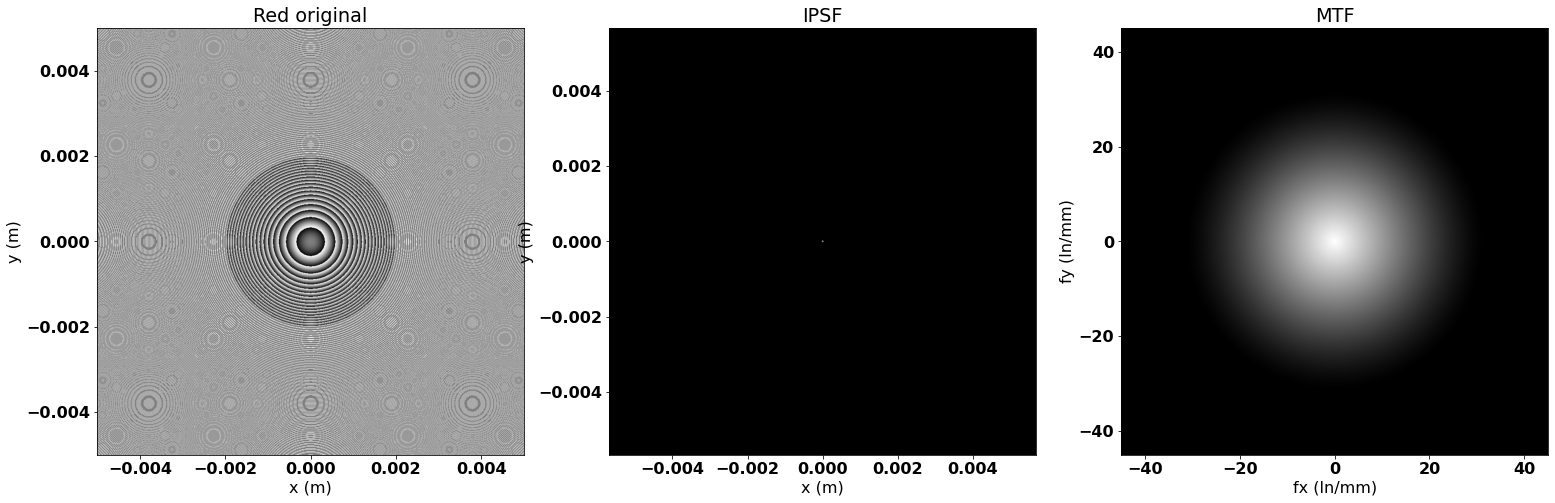

<Figure size 1296x720 with 0 Axes>

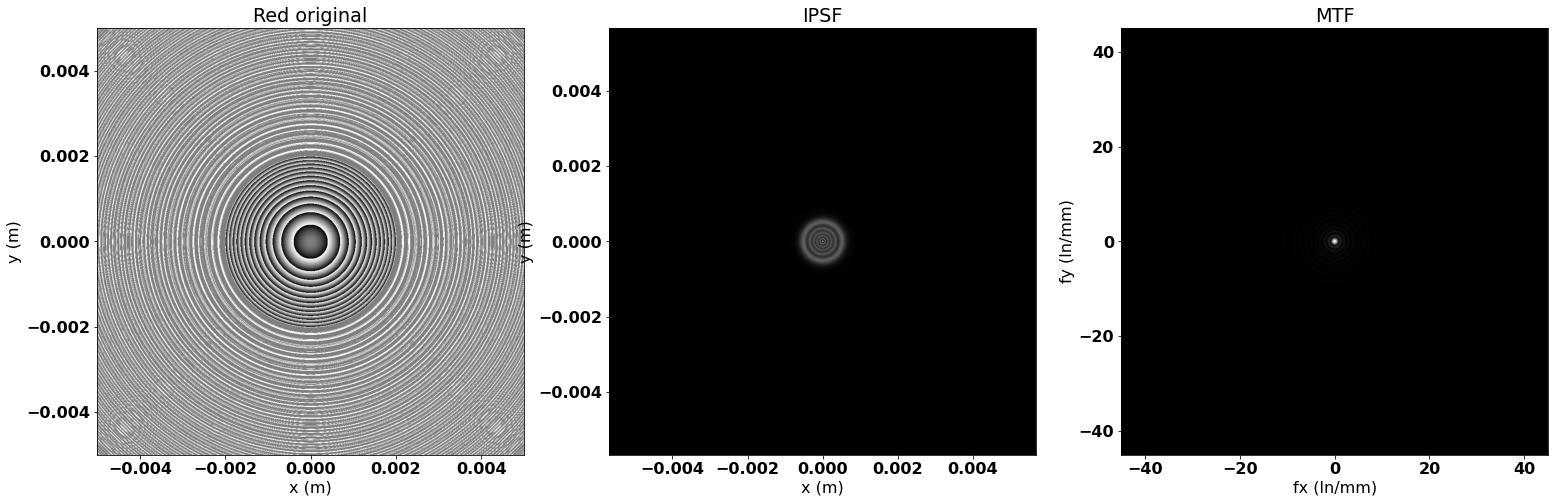

<Figure size 1800x360 with 0 Axes>

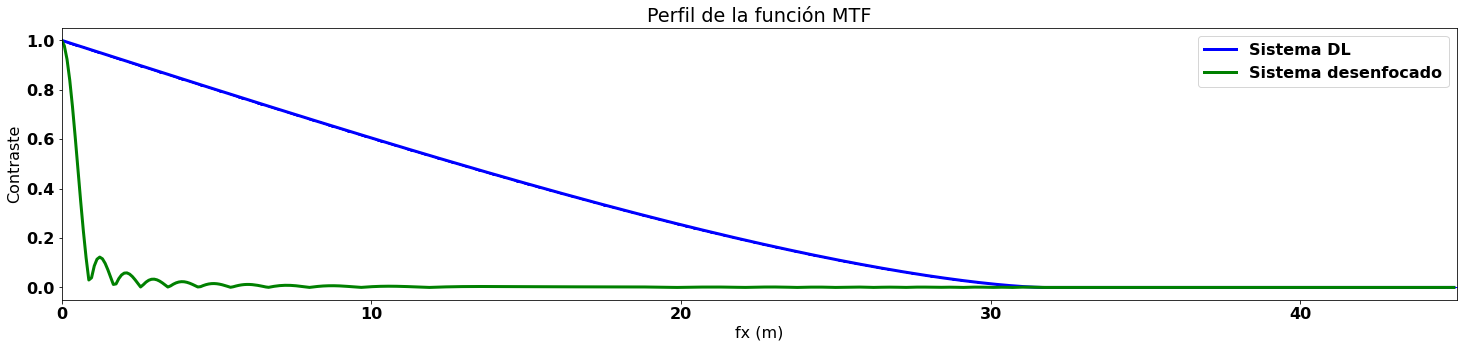

In [ ]:
L=10e-3
N=1024
dx=L/N
x=np.arange(-L/2,L/2,dx)
X, Y=np.meshgrid(x,x);

r=2e-3
lam=0.555e-6
k=2*np.pi/lam
zpex=0.2


###### Sistema limitado solo por difracción

eye=circ(X,Y,r)*np.exp((-1j*k/(2*zpex))*(X**2+Y**2)) # transmitancia de un ojo
psfoj=propTF(eye,L,lam,zpex)                      # PSF coherente
L2=lam*zpex/dx
dx2=L2/N
ipsfoj=np.abs(psfoj)**2                            # PSF incoherente
OTF_DL= np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ipsfoj)))*dx2**2  # Función de transferencia óptica
OTF_DL= OTF_DL/(np.max(np.max(np.abs(OTF_DL))))
MTF_DL=abs(OTF_DL)                                   # Función de transferencia de la modulación
fx=np.arange(-1/(2*dx2),1/(2*dx2),1/L2) 


# GRAFICACIÓN INTENSIDADES SISTEMA LIMITADO POR DIFRACCIÓN

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)

# imagen original
plt.subplot(1,3,1)
plt.imshow(np.angle(eye), cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Red original')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsfoj, cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('IPSF')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(MTF_DL, cmap='gray',extent=[-(1e-3)/(2*dx2),(1e-3)/(2*dx2),-(1e-3)/(2*dx2),(1e-3)/(2*dx2)],origin='lower')
plt.title('MTF')
plt.ylabel('fy (ln/mm)')
plt.xlabel('fx (ln/mm)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


######## Sistema desenfocado

z=0.66
L2=lam*zpex/dx
dx2=L2/N
uobj=np.exp(1j*k/(2*z)*(X**2+Y**2))
Pup=circ(X,Y,r)*eye*uobj
psf_Ab=propTF(Pup,L,lam,zpex)                       # PSF coherente
ipsf_Ab=np.abs(psf_Ab)**2                            # PSF incoherente
OTF_Ab= np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ipsf_Ab)))*dx**2  # Función de transferencia óptica
OTF_Ab= OTF_Ab/(np.max(np.max(np.abs(OTF_Ab))))
MTF_Ab=abs(OTF_Ab)                                   # Función de transferencia de la modulació

fx=np.arange(-1/(2*dx2),1/(2*dx2),1/L2)
FX, FY=np.meshgrid(fx,fx);

# GRAFICACIÓN INTENSIDADES SISTEMA LIMITADO POR DIFRACCIÓN

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)

# imagen original
plt.subplot(1,3,1)
plt.imshow(np.angle(Pup), cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Red original')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsf_Ab, cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('IPSF')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(MTF_Ab, cmap='gray',extent=[-(1e-3)/(2*dx2),(1e-3)/(2*dx2),-(1e-3)/(2*dx2),(1e-3)/(2*dx2)],origin='lower')
plt.title('MTF')
plt.ylabel('fy (ln/mm)')
plt.xlabel('fx (ln/mm)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(1e-3*fx,MTF_DL[round(N/2),:],lw=3,marker='_',label = 'Sistema DL',color='blue')
plt.plot(1e-3*fx,MTF_Ab[round(N/2),:],lw=3,label = 'Sistema desenfocado',color='green')
#plt.plot(x2,I21[round(N/2),:],color='black',marker='+',ms=8, label='Perfil simulado para n= %.1f' % n)
plt.legend(loc=1)
plt.title('Perfil de la función MTF')
plt.ylabel('Contraste')
plt.xlabel('fx (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(0,mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
F_cut=(2e-3)*r/(lam*zpex)
print('La frecuencia de corte incoherente es %.2f ln/mm' %F_cut)

#**OTF para sistemas formadores de imagen especiales**

0.01 0.010895360000000002


<Figure size 1296x720 with 0 Axes>

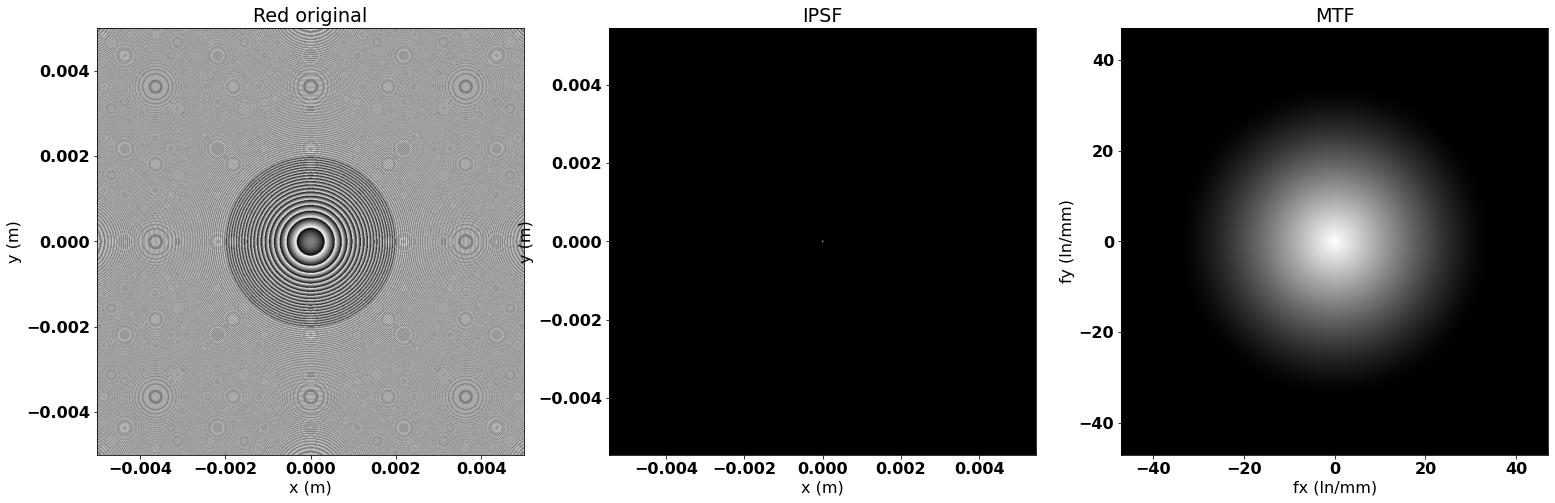

<Figure size 1296x720 with 0 Axes>

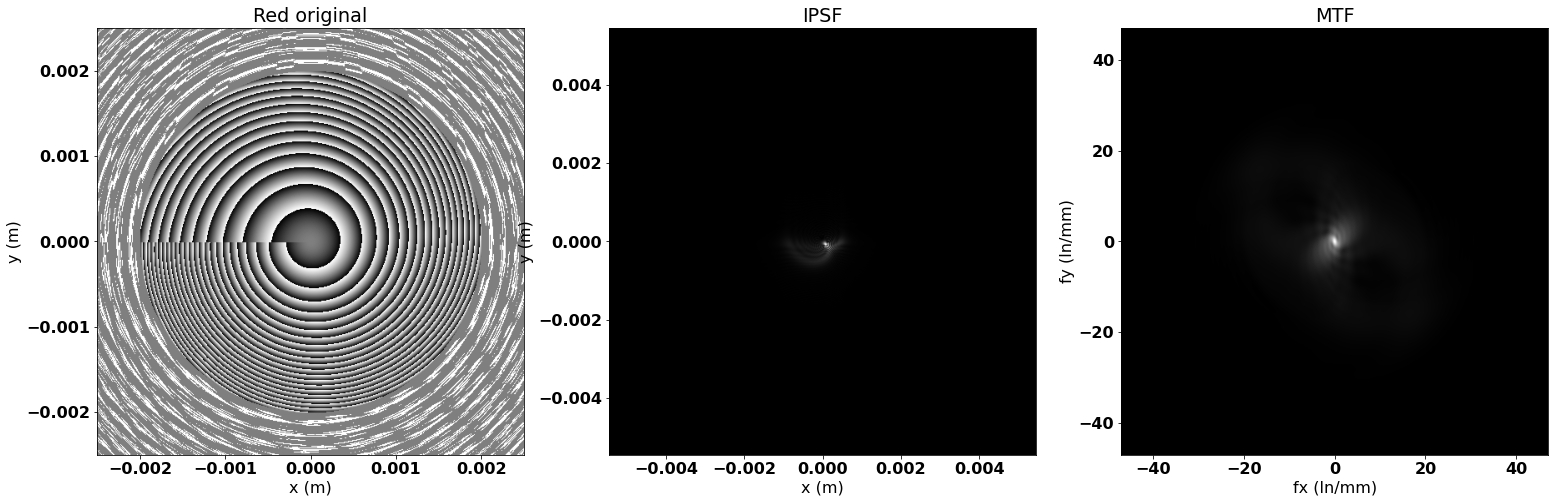

<Figure size 1800x360 with 0 Axes>

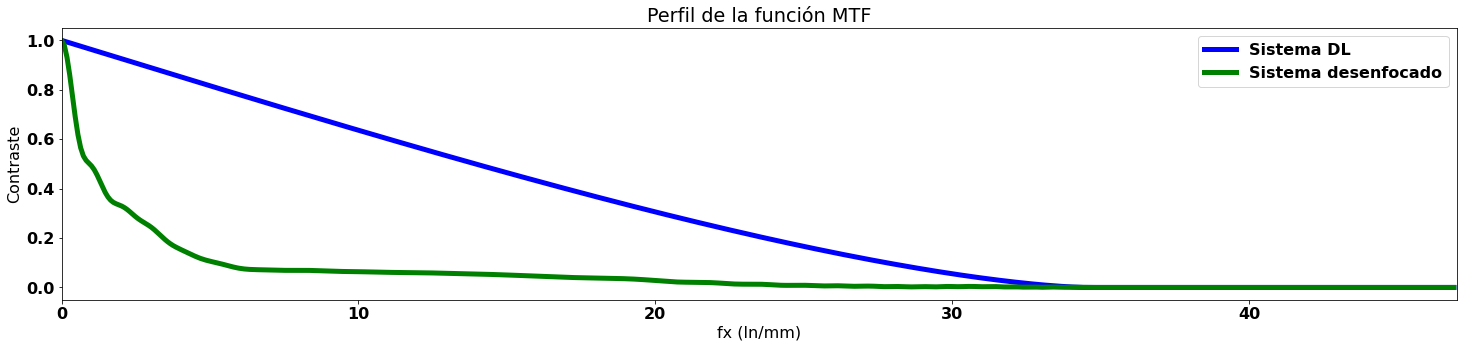

In [ ]:
L=10e-3
N=1024
dx=L/N
x=np.arange(-L/2,L/2,dx)
X, Y=np.meshgrid(x,x);

r=2e-3
lam=0.532e-6
k=2*np.pi/lam
zpex=0.2


###### Sistema limitado solo por difracción

eye=circ(X,Y,r)*np.exp((-1j*k/(2*zpex))*(X**2+Y**2)) # transmitancia de un ojo
psfoj=propTF(eye,L,lam,zpex)                      # PSF coherente
L2=lam*zpex/dx
dx2=L2/N
ipsfoj=np.abs(psfoj)**2                            # PSF incoherente
OTF_DL= np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ipsfoj)))*dx2**2  # Función de transferencia óptica
OTF_DL= OTF_DL/(np.max(np.max(np.abs(OTF_DL))))
MTF_DL=abs(OTF_DL)                                   # Función de transferencia de la modulación
fx=np.arange(-1/(2*dx2),1/(2*dx2),1/L2) 


# GRAFICACIÓN INTENSIDADES SISTEMA LIMITADO POR DIFRACCIÓN

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)

# imagen original
plt.subplot(1,3,1)
plt.imshow(np.angle(eye), cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Red original')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsfoj, cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('IPSF')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(MTF_DL, cmap='gray',extent=[-(1e-3)/(2*dx2),(1e-3)/(2*dx2),-(1e-3)/(2*dx2),(1e-3)/(2*dx2)],origin='lower')
plt.title('MTF')
plt.ylabel('fy (ln/mm)')
plt.xlabel('fx (ln/mm)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


######## Sistema desenfocado

z=0.66
L2=lam*zpex/dx
dx2=L2/N
uobj=np.exp(1j*k/(2*z)*(X**2+Y**2))

Pmax=3;
the=(90*np.pi)/180

uLSL=circ(X,Y,r)*np.exp(-1j*k*Pmax*(X**2+Y**2)*(np.arctan2(Y,X)+np.pi-the)/(2*(2*np.pi-the)))
Pup=uLSL*eye*uobj
psf_Ab=propTF(Pup,L,lam,zpex)                       # PSF coherente
ipsf_Ab=np.abs(psf_Ab)**2                            # PSF incoherente
OTF_Ab= np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ipsf_Ab)))*dx**2  # Función de transferencia óptica
OTF_Ab= OTF_Ab/(np.max(np.max(np.abs(OTF_Ab))))
MTF_Ab=abs(OTF_Ab)                                   # Función de transferencia de la modulació

fx=np.arange(-1/(2*dx2),1/(2*dx2),1/L2)
FX, FY=np.meshgrid(fx,fx);

# GRAFICACIÓN INTENSIDADES SISTEMA LIMITADO POR DIFRACCIÓN

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)

# imagen original
plt.subplot(1,3,1)
plt.imshow(np.angle(Pup)+np.pi, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Red original')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=5 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsf_Ab**(1/2), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('IPSF')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(MTF_Ab, cmap='gray',extent=[-(1e-3)/(2*dx2),(1e-3)/(2*dx2),-(1e-3)/(2*dx2),(1e-3)/(2*dx2)],origin='lower')
plt.title('MTF')
plt.ylabel('fy (ln/mm)')
plt.xlabel('fx (ln/mm)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(1e-3*fx,MTF_DL[round(N/2),:],lw=5,label = 'Sistema DL',color='blue')
plt.plot(1e-3*fx,MTF_Ab[round(N/2),:],lw=5,label = 'Sistema desenfocado',color='green')
#plt.plot(x2,I21[round(N/2),:],color='black',marker='+',ms=8, label='Perfil simulado para n= %.1f' % n)
plt.legend(loc=1)
plt.title('Perfil de la función MTF')
plt.ylabel('Contraste')
plt.xlabel('fx (ln/mm)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(0,mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
print(L,L2)